<a href="https://colab.research.google.com/github/himanshusharma9034/Prediction-for-the-Vehicle-Selling-price/blob/main/Vehicle_Selling_Price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [21]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [22]:
# read the data
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Vehicle_dataset/car data.csv')

In [23]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [24]:
df.shape
#there are 301 columns and 9 features
#Selling price is our output features which we need to find out

(301, 9)

In [25]:
#IDENTIFY THE CATEGORICAL DATA
#from above data it can be seen that fuel type, seller type, transmission are the categorical data


In [26]:
#PRINT THE UNIQUE VALUES OF THOSE CATEGORICAL FEATURES
print(df['Fuel_Type'].unique())
print(df['Seller_Type'].unique())
print(df['Transmission'].unique())
print(df['Owner'].unique())

['Petrol' 'Diesel' 'CNG']
['Dealer' 'Individual']
['Manual' 'Automatic']
[0 1 3]


In [27]:
#Check the missing and null values
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [28]:
# to see the details of the datset
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [29]:
# We have a feature "year" we are going to derive a new features by adding a new features that is the current year 2021
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [30]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [31]:
final_dataset = df[[ 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner']]

In [32]:
final_dataset.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [33]:
final_dataset['current_year']=2021

In [34]:
final_dataset.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,current_year
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2021
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2021
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2021
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2021
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2021


In [35]:
final_dataset['no_year']=final_dataset['current_year']-final_dataset['Year']

In [36]:
final_dataset.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,current_year,no_year
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2021,7
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2021,8
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2021,4
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2021,10
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2021,7


In [37]:
# now removing the unwanted feartues that is the Year and the current Year

In [38]:
final_dataset.drop(['Year'],axis=1,inplace=True)

In [39]:
final_dataset.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,current_year,no_year
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,2021,7
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,2021,8
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,2021,4
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,2021,10
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,2021,7


In [40]:
final_dataset.drop(['current_year'],axis=1,inplace=True)

In [41]:
final_dataset.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,no_year
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,7
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,8
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,4
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,10
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,7


In [42]:
#NOw how to convert this categorical features to some other value which is called as one hot encoded
# for that we will be using get_dummy, it's a function inside the panda's
final_dataset=pd.get_dummies(final_dataset,drop_first=True)
#drop_first = true will drop the first column of the ex[petrol,Desiel,CNG], so after doing one hot encoding ot will drop the petrol and CNG and deseil will be takes as 0 and 1 to avoid any dummy variable trap

In [43]:
final_dataset.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,no_year,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,7,0,1,0,1
1,4.75,9.54,43000,0,8,1,0,0,1
2,7.25,9.85,6900,0,4,0,1,0,1
3,2.85,4.15,5200,0,10,0,1,0,1
4,4.60,6.87,42450,0,7,1,0,0,1


In [44]:
#Fidning out the corelation:- How one featyre corelate with other?
final_dataset.corr()

,Selling_Price,Present_Price,Kms_Driven,Owner,no_year,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
Selling_Price,1.000000,0.878983,0.029187,-0.088344,-0.236141,0.552339,-0.540571,-0.550724,-0.367128
Present_Price,0.878983,1.000000,0.203647,0.008057,0.047584,0.473306,-0.465244,-0.512030,-0.348715
Kms_Driven,0.029187,0.203647,1.000000,0.089216,0.524342,0.172515,-0.172874,-0.101419,-0.162510
Owner,-0.088344,0.008057,0.089216,1.000000,0.182104,-0.053469,0.055687,0.124269,-0.050316
no_year,-0.236141,0.047584,0.524342,0.182104,1.000000,-0.064315,0.059959,0.039896,-0.000394
Fuel_Type_Diesel,0.552339,0.473306,0.172515,-0.053469,-0.064315,1.000000,-0.979648,-0.350467,-0.098643
Fuel_Type_Petrol,-0.540571,-0.465244,-0.172874,0.055687,0.059959,-0.979648,1.000000,0.358321,0.091013
Seller_Type_Individual,-0.550724,-0.512030,-0.101419,0.124269,0.039896,-0.350467,0.358321,1.000000,0.063240
Transmission_Manual,-0.367128,-0.348715,-0.162510,-0.050316,-0.000394,-0.098643,0.091013,0.063240,1.000000


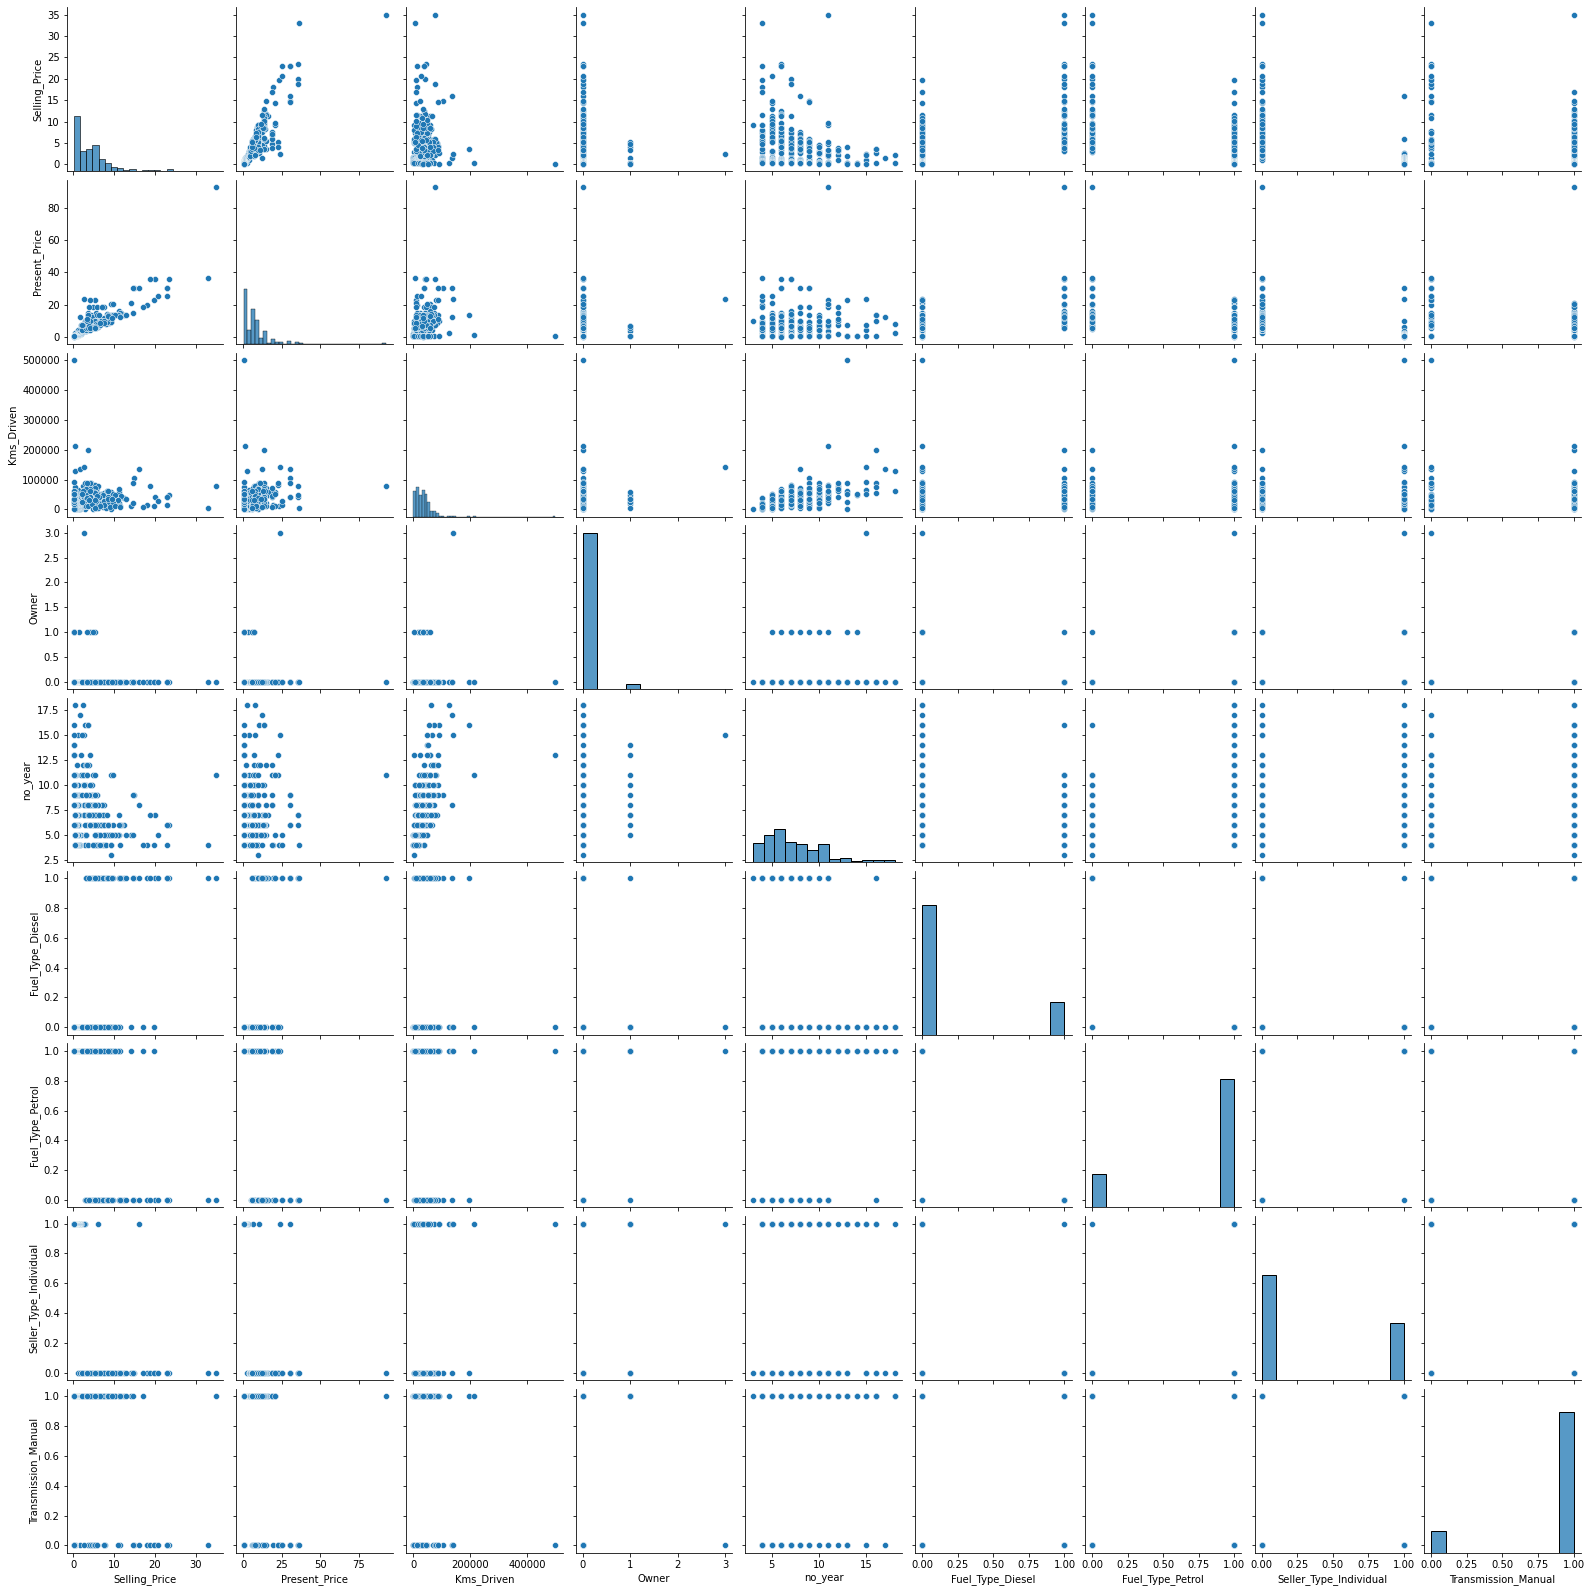

In [45]:
# display the corelation in a diag.
sns.pairplot(final_dataset)
# as pairplot is not going to give the much detail, so we will use the heatmap

In [46]:
corrmat = final_dataset.corr()
top_corr_features=corrmat.index   #corelation using euclidean distance
plt.figure(figsize=(20,20),dpi=500)
g = sns.heatmap(final_dataset[top_corr_features].corr(),annot=True,cmap='Pastel1')

In [47]:
#the more whave values towards grey colour the more they are corelated, and vice versa

In [48]:
final_dataset.head()
#selling price is the dependent feature and others are the independent features

,Selling_Price,Present_Price,Kms_Driven,Owner,no_year,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,7,0,1,0,1
1,4.75,9.54,43000,0,8,1,0,0,1
2,7.25,9.85,6900,0,4,0,1,0,1
3,2.85,4.15,5200,0,10,0,1,0,1
4,4.60,6.87,42450,0,7,1,0,0,1


In [49]:
# Taking independent and dependent features seperately
X = final_dataset.iloc[:,1:] # taking the Independent values
Y = final_dataset.iloc[:,0] # taking the dependent values

In [50]:
X.head() # Independent Features

,Present_Price,Kms_Driven,Owner,no_year,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,5.59,27000,0,7,0,1,0,1
1,9.54,43000,0,8,1,0,0,1
2,9.85,6900,0,4,0,1,0,1
3,4.15,5200,0,10,0,1,0,1
4,6.87,42450,0,7,1,0,0,1


In [51]:
Y.head() # Dependent Features

0    3.35
1    4.75
2    7.25
3    2.85
4    4.60
Name: Selling_Price, dtype: float64

In [52]:
#Feature importance , Caluculate important features
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor() #initializing the model
model.fit(X,Y)

ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=None, oob_score=False,
                    random_state=None, verbose=0, warm_start=False)

In [53]:
print(model.feature_importances_)
## we can see that the for the indeprndent variables 
#0th features - 2nd highest importance
#1st features - 1st highest importance
#4th features - 3rd highest feature_importances_


[0.38598996 0.04101274 0.00103392 0.07599829 0.22785073 0.00953637
 0.11495616 0.14362183]


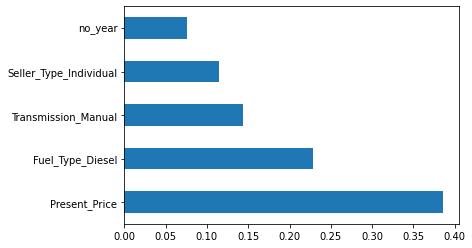

In [54]:
# Plot graph of the feature importance for the better visualization
feat_importance = pd.Series(model.feature_importances_, index=X.columns)
feat_importance.nlargest(5).plot(kind='barh') #top 5 features
plt.show()

In [55]:
#train test spli
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2)#20% size we will take

In [56]:
X_train.head()#independent variables

,Present_Price,Kms_Driven,Owner,no_year,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
291,6.10,31427,0,6,0,1,0,1
97,18.64,8700,0,4,0,1,0,1
42,7.15,58000,0,13,0,1,0,1
191,0.57,25000,1,9,0,1,1,1
9,8.92,42367,0,6,1,0,0,1


In [57]:
Y_train.head()#dependent variables

291     5.40
97     17.00
42      1.95
191     0.20
9       7.45
Name: Selling_Price, dtype: float64

In [58]:
#Impletent random forest regressor,as it uses decision tree
from sklearn.ensemble import RandomForestClassifier
rf_random = RandomForestClassifier()
#n_estimators is a parameters is also known as decisiontree and can assigned different different values
# by defaults value is 100

In [59]:
###Hypeparameters are the type of different paramenter's
# 1- n_estimators(create different numbers of decision tree) --->create a list 
n_estimators=[int(x) for x in np.linspace(start = 100, stop =1200, num=12)]# using different dicision values
print(n_estimators)# different parameters for the trees

[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200]


In [60]:
# Number of features to consider at every split
max_features = ['auto','sqrt']
#Maximum number of levels in a tree
max_depth = [int(x) for x in np.linspace(5,30,num=6)]
#maximum number of samples required to split a node
min_samples_split = [2,5,10,15,100]
#minimum numbe of samples required at each leaf node
min_samples_leaf = [1,2,3,10]

In [61]:
#RandomizedSearchCV -- >it helps us to find the best parameters out of these considering this that how many estimators should be there, how many depth and wtc should be there
from sklearn.model_selection import RandomizedSearchCV

In [62]:
#create the random grid
random_grid = {'n_estimators' : n_estimators,
               'max_features' : max_features,
               'max_depth' : max_depth,
               'min_samples_split' : min_samples_split,
               'min_samples_leaf' : min_samples_leaf}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 3, 10]}


In [63]:
#initialize Random Forestor
# use the random grid to search for the best hyperparameters
# First we will create the base model to tune
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()

In [66]:
#APPLYING THE RANDOMIZED SEARCHcv
rf_random = RandomizedSearchCV(estimator= rf, param_distributions=random_grid, scoring='neg_mean_squared_error', cv=5, verbose=2,n_iter=10,random_state= 42, n_jobs=1)


In [67]:
rf_random.fit(X_train,Y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=3, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=3, max_features=sqrt, max_depth=10, total=   1.2s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=3, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.2s remaining:    0.0s


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=3, max_features=sqrt, max_depth=10, total=   1.2s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=3, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=3, max_features=sqrt, max_depth=10, total=   1.2s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=3, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=3, max_features=sqrt, max_depth=10, total=   1.3s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=3, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=3, max_features=sqrt, max_depth=10, total=   1.3s
[CV] n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15 
[CV]  n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15, total=   1.5s
[CV] n_estimators=1100, min_samples_split=10, mi

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   50.0s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [69]:
#prediction
predictions =rf_random.predict(X_test)

In [70]:
predictions

array([ 5.41755  ,  1.34216  ,  4.2426   ,  0.99655  ,  1.31724  ,
        9.4717   ,  8.46629  ,  0.59113  ,  5.0557   ,  2.5443   ,
        6.78625  ,  0.67934  ,  0.77025  ,  0.24281  ,  0.44796  ,
        0.46065  ,  8.91687  ,  4.62889  ,  4.89684  ,  0.44614  ,
        7.60747  ,  4.9265   ,  1.26108  ,  2.29712  ,  6.80877  ,
        2.98057  ,  5.39943  ,  3.3997   ,  0.96869  ,  1.07291  ,
        5.85844  ,  3.46215  ,  3.82564  ,  6.60292  ,  1.01477  ,
        8.04878  ,  0.55152  ,  0.49661  ,  3.7562   ,  0.47965  ,
        7.35711  ,  4.9962   ,  0.42006  ,  8.46629  ,  8.38128  ,
        5.26793  ,  0.63737  ,  5.97922  , 10.37743  ,  2.9159   ,
        0.44451  ,  3.19215  , 21.0836   ,  5.3884   ,  0.30383  ,
        4.66265  ,  6.75342  ,  4.8383825,  4.1187   ,  5.60024  ,
        5.7164   ])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


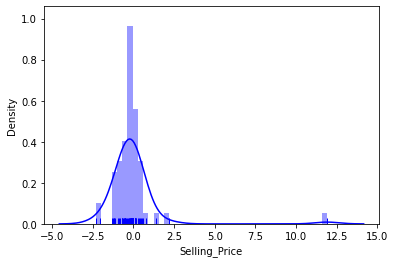

In [79]:
sns.distplot(Y_test-predictions,rug=True,color='B')

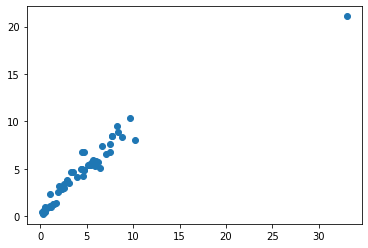

In [75]:
plt.scatter(Y_test,predictions)
# as the graph or predictions are linearly available so we can say our prediction is good

In [80]:
#Pickle the file---> where you want to store your data
import pickle
file = open('random_forest_regression_model.pk1','wb')


In [81]:
#dump all the information to that particular file
pickle.dump(rf_random,file)